In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('Iris.csv')

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25324\727826619.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


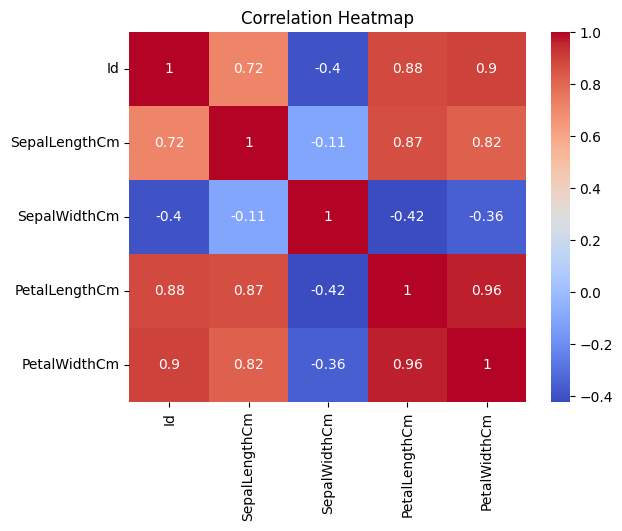

In [24]:
import seaborn as sns
df_corr = df.corr()

import matplotlib.pyplot as plt

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Trial Bayesian Regression

In [26]:
from sklearn.model_selection import train_test_split
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']]
y = df[['PetalWidthCm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import BayesianRidge
# Import the necessary libraries
# Create an instance of the BayesianRidge model
model = BayesianRidge()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test, True)


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_pred = pd.DataFrame(y_pred)

In [29]:
y_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.572786,0.304116,2.331430,1.512524,1.467544,0.173068,1.125630,1.673651,1.304889,1.193117,...,0.337983,1.725265,0.316552,1.982292,2.299439,1.748710,1.950928,2.143766,0.162892,0.292169
1,0.259764,0.281381,0.280894,0.259839,0.275359,0.272010,0.256796,0.277799,0.259876,0.257410,...,0.253985,0.260939,0.262322,0.261122,0.300220,0.271664,0.263710,0.272348,0.255529,0.254961


In [30]:
y_pred = y_pred.transpose()


In [44]:
y_pred

,0,1
0,1.572786,0.259764
1,0.304116,0.281381
2,2.331430,0.280894
3,1.512524,0.259839
4,1.467544,0.275359
5,0.173068,0.272010
6,1.125630,0.256796
7,1.673651,0.277799
8,1.304889,0.259876
9,1.193117,0.257410


In [37]:
y_test

,PetalWidthCm
73,1.2
18,0.3
118,2.3
78,1.5
76,1.4
31,0.4
64,1.3
141,2.3
68,1.5
82,1.2


In [41]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred[0])
print(f"MAPE: {mape * 100}")


MAPE: 23.606099853899465


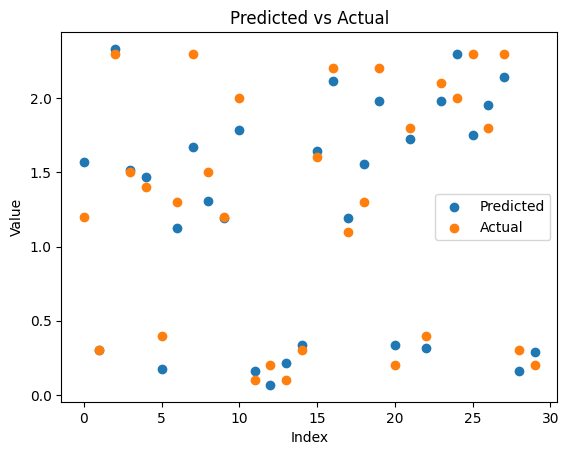

In [42]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_pred[0])), y_pred[0], label='Predicted')
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Predicted vs Actual')
plt.show()


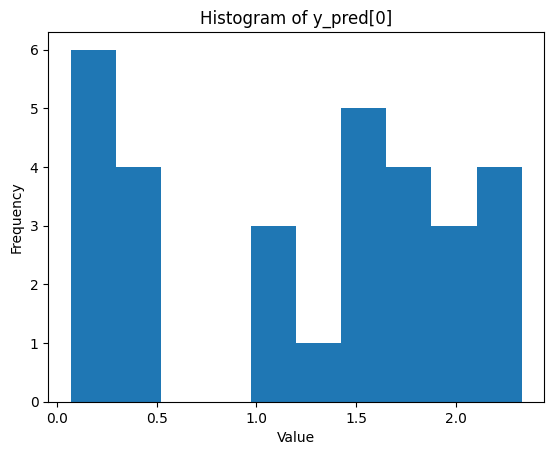

In [43]:
import matplotlib.pyplot as plt

plt.hist(y_pred[0], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_pred[0]')
plt.show()


In [56]:
y_pred

,0,1
0,1.572786,0.259764
1,0.304116,0.281381
2,2.331430,0.280894
3,1.512524,0.259839
4,1.467544,0.275359
5,0.173068,0.272010
6,1.125630,0.256796
7,1.673651,0.277799
8,1.304889,0.259876
9,1.193117,0.257410


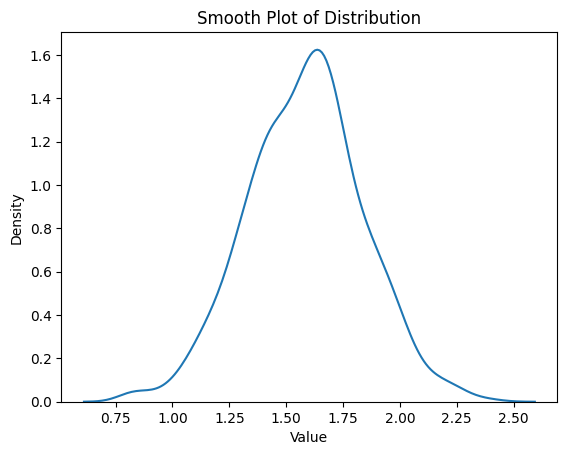

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mean = 1.572786
std_dev = 0.259764

# Generate a random distribution with the specified mean and standard deviation
distribution = np.random.normal(mean, std_dev, size=1000)


sns.kdeplot(distribution)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth Plot of Distribution')
plt.show()




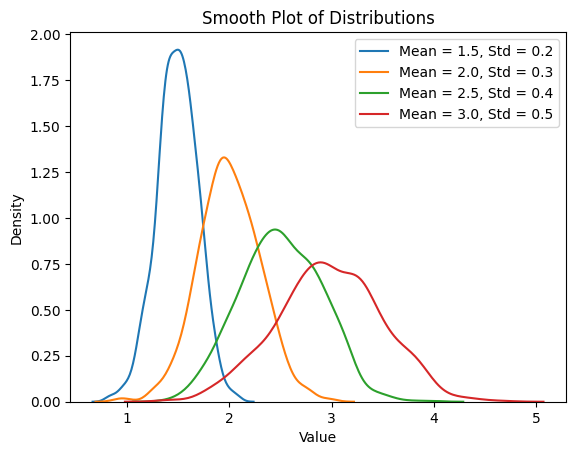